# Data Scientist Nanodegree Program
## Project: Write A Data Science Blog Post
## TMDB 5000 Movie Dataset




## Step 1: Business Understanding


The Movie Database provides movie data for public use.  Given that major films costing over $100 million to produce can still flop, Analyze this data is more important than ever to the industry. Can we tell the direction of films and changes budget over time? Which languages are most popular ?
Can we classify the data to we can predict in the future?


## Step 2: Data Understanding

### Step 2.1: Load the Data



#### The Movie Database provides two datasets :

#### tmdb_5000_movies (Movie credits data):
- budget
- genres
- homepage
- id
- keywords
- original_language
- original_title
- overview
- popularity
- production_companies
- production_countries
- release_date
- revenue
- runtime
- spoken_languages
- status
- tagline
- title
- vote_average
- vote_count

#### tmdb_5000_credits:
- movie_id
- title
- cast
- crew

In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [499]:
movies = pd.read_csv('tmdb_5000_movies.csv',index_col=3)
credits = pd.read_csv('tmdb_5000_credits.csv', index_col=0)

In [500]:
movies.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [501]:
movies['profit'] = movies.revenue - movies.budget
movies.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
id,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000


In [502]:
credits.head(2)

,title,cast,crew
movie_id,,,
19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."



### Step 2.2: Clean the Data

Several of the new columns contain json. You can save a bit of time by porting the load data functions from this kernel.


In [503]:
credits.drop(["title"], axis=1, inplace=True)

In [504]:
credits.head(2)

,cast,crew
movie_id,,
19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [505]:
movies= movies.join(credits)
movies.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [506]:
movies.release_date = pd.to_datetime(movies['release_date'])
movies["year"] = movies.release_date.dt.year


In [507]:
from pandas.io.json import json_normalize
import json
def json_decode(data,key):
    
    """
Description: This function can be used to helpful to perform decoding in Python of JSON string.

Arguments:
    data: the data that we want decoding. 
    key: the key that we want to return its value.

Returns:
    list of values
"""
    result = []
    data = json.loads(data) #convert to jsonjsonn from string
    for item in data: #convert to list from json
        result.append(item[key])
    return result

In [508]:
movies.genres = movies.genres.apply(json_decode,key='name')

In [509]:
movies.keywords = movies.keywords.apply(json_decode,key='name')

In [510]:
movies.production_companies = movies.production_companies.apply(json_decode,key='name')

In [511]:
movies.production_countries = movies.production_countries.apply(json_decode,key='name')

In [512]:
movies.cast = movies.cast.apply(json_decode,key='name')

In [513]:
movies.crew = movies.crew.apply(json_decode,key='name')


In [514]:
movies.spoken_languages = movies.spoken_languages.apply(json_decode,key='name')

In [515]:
movies.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,profit,cast,crew,year
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",2009.0
285,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2007.0


In [516]:
# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------


### Step 2.3: Assess Missing Data

#### Step 2.3.1: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. I used matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. 

In [517]:
missing = movies.isnull().sum()
missing.sum()

3942

In [518]:
missing = movies.isnull().sum()
missing.sum()

3942

In [519]:
missing.describe()

count      23.000000
mean      171.391304
std       660.268798
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max      3091.000000
dtype: float64

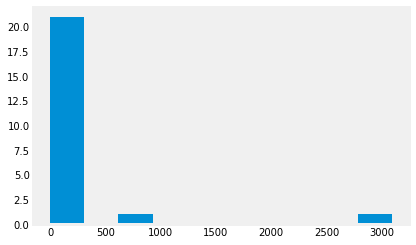

In [520]:
missing.hist(grid=False);

In [521]:
high_missing = missing[missing > 500].index
movies.drop(high_missing, axis=1, inplace=True)
movies.shape

(4803, 21)

In [522]:
high_missing

Index(['homepage', 'tagline'], dtype='object')

In [524]:
missing1 = movies.isnull().sum()
missing1.sum()

7

- We can see that we have a column with 3091 missing values, which is 78% of the missing values.
- The two columns that were dropped were homepage, GEBURTSJAHR, tagline.

#### Step 2.3.2: Assess Missing Data in Each Row

How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. 

In [525]:
missing_rows = movies.isnull()
missing_rows.sum(axis=1)

id
19995     0
285       0
206647    0
49026     0
49529     0
559       0
38757     0
99861     0
767       0
209112    0
1452      0
10764     0
58        0
57201     0
49521     0
2454      0
24428     0
1865      0
41154     0
122917    0
1930      0
20662     0
57158     0
2268      0
254       0
597       0
271110    0
44833     0
135397    0
37724     0
         ..
2292      0
42497     0
33693     0
14585     0
185465    0
38780     0
14022     0
366967    0
255266    0
17345     0
226458    0
24055     0
287625    0
44990     0
86304     0
692       0
39851     0
13898     0
157185    0
36095     0
182291    0
286939    0
124606    0
14337     0
67238     0
9367      0
72766     0
231617    0
126186    0
25975     0
Length: 4803, dtype: int64

In [526]:
missing_row_totals = missing_rows.sum(axis=1)
missing_row_totals.describe()

count    4803.000000
mean        0.001457
std         0.052010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
dtype: float64

In [527]:
movies.dropna(inplace=True)

In [528]:
missing3 = movies.isnull().sum()
missing3.sum()

0

7 missing values we can delete but I prefer to search for more data about the rows. the mean of missing value is too small (0.001457). The maximum number of missing values ​​in a row is 2 values.

In [529]:
movies.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,title,vote_average,vote_count,profit,cast,crew,year
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,...,162.0,"[English, Español]",Released,Avatar,7.2,11800,2550965087,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",2009.0
285,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,...,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2007.0


### Step 2.4: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress.


In [530]:
genres = set()
for item in movies.genres:
    for genre in item:
        genres.add(genre)
genres = list(genres)
print(genres)

['Action', 'History', 'Science Fiction', 'Romance', 'TV Movie', 'Animation', 'War', 'Mystery', 'Music', 'Family', 'Horror', 'Foreign', 'Fantasy', 'Thriller', 'Crime', 'Adventure', 'Comedy', 'Western', 'Drama', 'Documentary']


In [531]:
df = pd.DataFrame(columns=genres)
df.head()

,Action,History,Science Fiction,Romance,TV Movie,Animation,War,Mystery,Music,Family,Horror,Foreign,Fantasy,Thriller,Crime,Adventure,Comedy,Western,Drama,Documentary


In [532]:
for index, row in movies.iterrows():
    for item in row['genres']:
        df.loc[index,item] = 1
df.head(2)

,Action,History,Science Fiction,Romance,TV Movie,Animation,War,Mystery,Music,Family,Horror,Foreign,Fantasy,Thriller,Crime,Adventure,Comedy,Western,Drama,Documentary
19995,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN
285,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN


In [533]:
df.fillna(0,inplace=True)


In [534]:
movies = movies.join(df)
movies.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,Horror,Foreign,Fantasy,Thriller,Crime,Adventure,Comedy,Western,Drama,Documentary
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
285,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [535]:
production_companies = set()
for item in movies.production_companies:
    for company in item:
        production_companies.add(company)
production_companies = list(production_companies)
print(production_companies)

['Atlas Entertainment', 'Shady Acres Entertainment', 'Polygram Filmed Entertainment', 'Island Pictures', 'Beanca Films', 'Global Entertainment Productions GmbH & Company Medien KG', 'Illuminata Pictures', 'Beijing Jinyinma Movie & TV Culture Co.', 'CIP Filmproduktion GmbH', 'Albert S. Ruddy Productions', 'Oscilloscope Laboratories', 'Annuit Coeptis Entertainment II', 'Taken 3', 'Journeyman Pictures', 'Beech Hill Films', 'Culmination Productions', 'Media Cooperation One', 'Danjaq', 'Movieworld Productions', 'American Film Company', 'Purple Pictures', 'Morgan & Chan Films', 'Curmudgeon Films', 'Paragon Films Ltd.', 'Liveplanet', 'Prospect Park', 'Sahara Productions', 'Tremolo Productions', 'Laundry Films', 'Stillking Films', 'Les Films du Parc', 'Huayi Brothers Pictures', 'XYZ Funding N.V.', 'Zeke Productions', 'Collision Entertainment', 'Grindfest', 'White Noise UK Ltd.', 'Brookstreet Pictures', 'Creative Unit of Writers & Cinema Workers', 'Quite Quick Productions', 'Van Hoy/Knudsen Pro

In [536]:
production_countries = set()
for item in movies.production_countries:
    for country in item:
        production_countries.add(country)
production_countries = list(production_countries)
print(production_countries)

['Sweden', 'Turkey', 'Mexico', 'Netherlands', 'Libyan Arab Jamahiriya', 'India', 'Slovenia', 'Ukraine', 'Switzerland', 'Luxembourg', 'Thailand', 'Austria', 'Iceland', 'Guadaloupe', 'Belgium', 'Dominica', 'Kyrgyz Republic', 'Israel', 'Lebanon', 'Angola', 'Slovakia', 'Canada', 'South Africa', 'Japan', 'Chile', 'Norway', 'Spain', 'Czech Republic', 'Iran', 'Kazakhstan', 'Jordan', 'Afghanistan', 'United Kingdom', 'Hong Kong', 'United States of America', 'Bulgaria', 'Indonesia', 'Malaysia', 'Peru', 'Panama', 'Bahamas', 'Portugal', 'Romania', 'Brazil', 'Germany', 'Colombia', 'Greece', 'France', 'Nigeria', 'Cyprus', 'Monaco', 'Bolivia', 'Aruba', 'Australia', 'Cameroon', 'New Zealand', 'Hungary', 'Cambodia', 'Denmark', 'Jamaica', 'Serbia', 'Ecuador', 'Dominican Republic', 'Serbia and Montenegro', 'Fiji', 'Malta', 'Bhutan', 'Morocco', 'Ireland', 'Singapore', 'Lithuania', 'Tunisia', 'Egypt', 'Poland', 'United Arab Emirates', 'Kenya', 'Guyana', 'Pakistan', 'Bosnia and Herzegovina', 'Argentina', 'P

In [537]:
df2 = pd.DataFrame(columns=production_countries)

In [538]:
for index, row in movies.iterrows():
    for item in row['production_countries']:
        df2.loc[index,item] = 1

In [539]:
df2.fillna(0,inplace=True)

In [540]:
df2.head(20)

,Sweden,Turkey,Mexico,Netherlands,Libyan Arab Jamahiriya,India,Slovenia,Ukraine,Switzerland,Luxembourg,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [541]:
movies = movies.join(df2)
movies.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [542]:
movies.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [543]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 19995 to 25975
Columns: 129 entries, budget to South Korea
dtypes: datetime64[ns](1), float64(112), int64(4), object(12)
memory usage: 4.9+ MB


In [544]:
movies=movies.drop(['genres','keywords', 'original_title',
                    'overview','production_companies', 'production_countries',
                    'spoken_languages','status','title'], axis = 1)

In [545]:
movies.head(2)

,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,profit,cast,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,en,150.437577,2009-12-10,2787965087,162.0,7.2,11800,2550965087,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,300000000,en,139.082615,2007-05-19,961000000,169.0,6.9,4500,661000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [546]:
movies=movies.drop(['cast','crew'], axis = 1)

In [547]:
movies.head(2)

,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,profit,year,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,en,150.437577,2009-12-10,2787965087,162.0,7.2,11800,2550965087,2009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,300000000,en,139.082615,2007-05-19,961000000,169.0,6.9,4500,661000000,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movies=movies.drop(['genres','keywords', 'original_title',
                    'overview','production_companies', 'production_countries',
                    'spoken_languages','status','title'], axis = 1)

- We have 'genres','keywords', 'original_title','overview','production_companies', 'production_countries', 'spoken_languages','status','title' categorical variables.
- I decided to keep variables genres and production_countries that seemed likely to capture the useful data and which do not contain many values.

## Question 1: Changes over time
### How have movie budget and revenue changed over time؟

In [548]:
dataQ1 = movies.copy()
#dataQ1["year"] = dataQ1["year"].astype('category')
dataQ1.head(2)

,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,profit,year,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,en,150.437577,2009-12-10,2787965087,162.0,7.2,11800,2550965087,2009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,300000000,en,139.082615,2007-05-19,961000000,169.0,6.9,4500,661000000,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [549]:
datareleasedate = dataQ1.sort_values('release_date')

budget1 = datareleasedate.groupby('release_date')['budget'].sum().reset_index()
revenue1 = datareleasedate.groupby('release_date')['revenue'].sum().reset_index()

budget1 = budget1.set_index('release_date')
revenue1 = revenue1.set_index('release_date')

y_budget1 = budget1['budget'].resample('BAS').sum()
y_revenue1 = revenue1['revenue'].resample('BAS').sum()

budget1 = pd.DataFrame({'release_date':y_budget1.index, 'budget':y_budget1.values})
revenue1 = pd.DataFrame({'release_date': y_revenue1.index, 'revenue': y_revenue1.values})

store = budget1.merge(revenue1, how='inner', on='release_date')
store.rename(columns={'Sum_x': 'budget', 'Sum_y': 'revenue'}, inplace=True)
store.head()


,budget,release_date,revenue
0,385907.0,1916-01-03,8394751.0
1,NaN,1917-01-01,NaN
2,NaN,1918-01-01,NaN
3,NaN,1919-01-01,NaN
4,NaN,1920-01-01,NaN


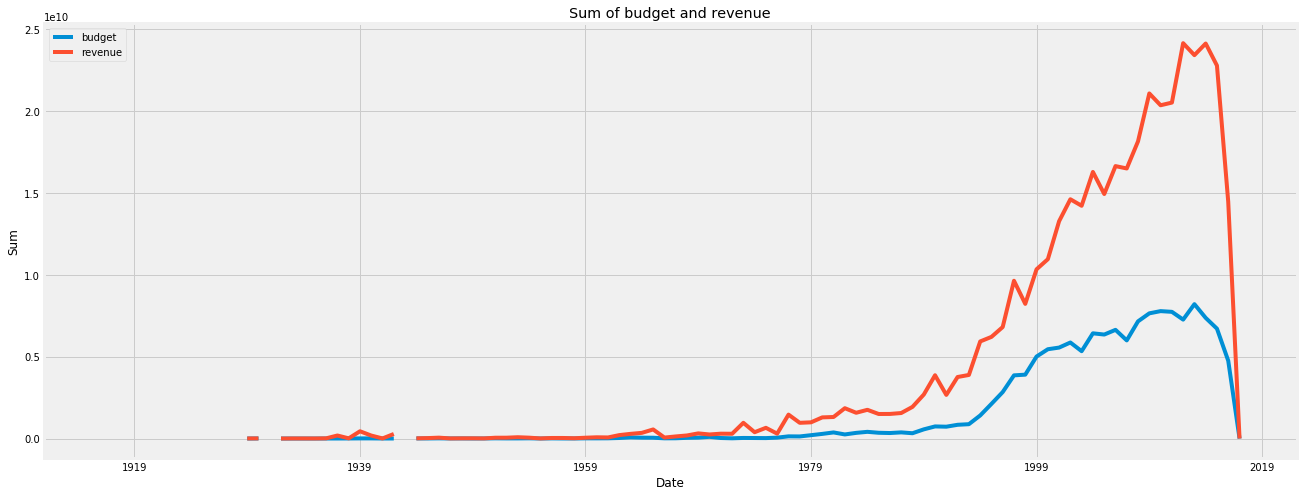

In [550]:
plt.figure(figsize=(20, 8))
plt.plot(store['release_date'], store['budget'], label = 'budget')
plt.plot(store['release_date'], store['revenue'], label = 'revenue')
plt.xlabel('Date'); plt.ylabel('Sum'); plt.title('Sum of budget and revenue')
plt.legend();

In [551]:
data20year = dataQ1.query('release_date >= 1995 & release_date < 2015')
#dataQ1["year"] = dataQ1["year"].astype('category')
data20year.head(2)


,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,profit,year,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,en,150.437577,2009-12-10,2787965087,162.0,7.2,11800,2550965087,2009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,300000000,en,139.082615,2007-05-19,961000000,169.0,6.9,4500,661000000,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [552]:
datareleasedate = data20year.sort_values('release_date')

budget1 = datareleasedate.groupby('release_date')['budget'].sum().reset_index()
revenue1 = datareleasedate.groupby('release_date')['revenue'].sum().reset_index()

budget1 = budget1.set_index('release_date')
revenue1 = revenue1.set_index('release_date')

y_budget1 = budget1['budget'].resample('BAS').sum()
y_revenue1 = revenue1['revenue'].resample('BAS').sum()
# business year start frequency

budget1 = pd.DataFrame({'release_date':y_budget1.index, 'budget':y_budget1.values})
revenue1 = pd.DataFrame({'release_date': y_revenue1.index, 'revenue': y_revenue1.values})

store = budget1.merge(revenue1, how='inner', on='release_date')
store.rename(columns={'Sum_x': 'budget', 'Sum_y': 'revenue'}, inplace=True)
store.head()

,budget,release_date,revenue
0,2116350008,1995-01-02,6207143123
1,2837092051,1996-01-01,6808007511
2,3857666953,1997-01-01,9634746300
3,3900440251,1998-01-01,8223101034
4,5006425673,1999-01-01,10332740909


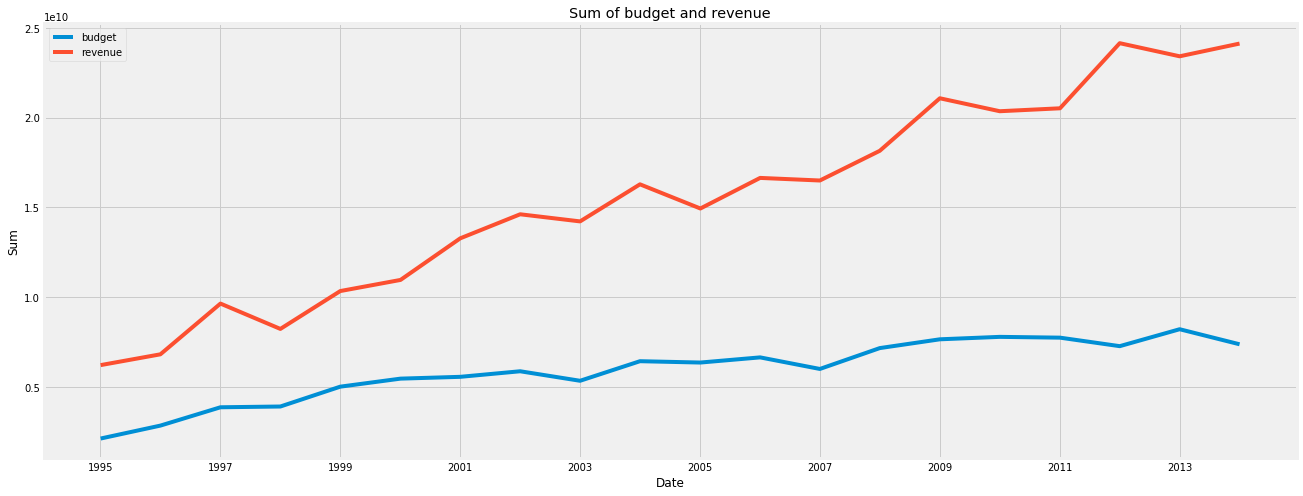

In [553]:
plt.figure(figsize=(20, 8))
plt.plot(store['release_date'], store['budget'], label = 'budget')
plt.plot(store['release_date'], store['revenue'], label = 'revenue')
plt.xlabel('Date'); plt.ylabel('Sum'); plt.title('Sum of budget and revenue')
plt.legend();

### How have movie Runtime changed over time?

In [554]:
dfrelease_date = dataQ1.sort_values('release_date')
dfrelease_date = dataQ1.groupby('release_date')['runtime'].mean().reset_index()

In [555]:
dfrelease_date = dfrelease_date.set_index('release_date')
dfrelease_date.index

DatetimeIndex(['1916-09-04', '1925-11-05', '1927-01-10', '1929-01-30',
               '1929-02-08', '1930-11-15', '1932-12-08', '1933-02-02',
               '1933-02-09', '1934-02-22',
               ...
               '2016-07-29', '2016-08-02', '2016-08-10', '2016-08-17',
               '2016-08-26', '2016-09-02', '2016-09-09', '2016-09-16',
               '2016-10-02', '2017-02-03'],
              dtype='datetime64[ns]', name='release_date', length=3278, freq=None)

In [556]:
runtime = dfrelease_date['runtime'].resample('A').mean()

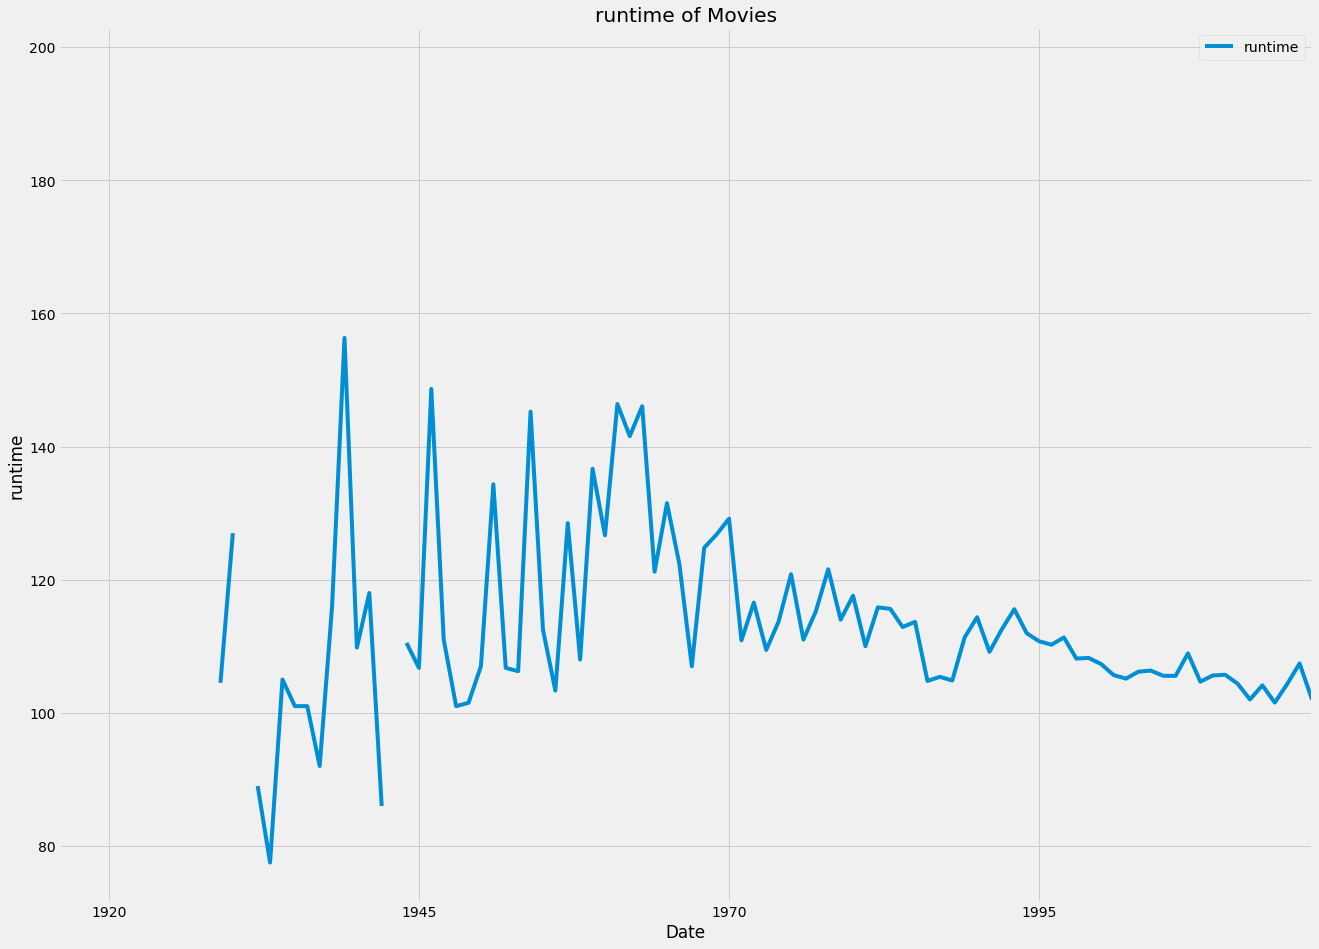

In [557]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
runtime.plot(figsize=(20, 15))
plt.xlabel('Date'); plt.ylabel('runtime'); plt.title('runtime of Movies')
plt.legend();
plt.show()


## Question 2: Top 5 movie original language 


In [562]:
dataQ2 = movies.groupby(['original_language']).sum()
dataQ2.sort_values("profit", ascending = False, inplace = True) 
dataQ2.head(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,profit,year,Action,History,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
original_language,,,,,,,,,,,,,,,,,,,,,
en,136926595699,99909.292696,389587217807,479548.0,27325.9,3239202,252660622108,9016527.0,1086.0,162.0,...,1.0,4.0,1.0,48.0,1.0,8.0,28.0,3.0,2.0,6.0
ja,228697699,410.620602,1056462649,1960.0,112.8,11452,827764950,31997.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zh,594691110,242.896520,1126844453,3134.0,170.1,3958,532153343,54257.0,18.0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,25.0,0.0,3.0,1.0
es,187125867,426.585722,596869710,3491.0,213.1,9660,409743843,64195.0,4.0,1.0,...,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
fr,593669811,720.967952,872305944,7358.0,450.1,16018,278636133,140324.0,7.0,5.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0



## Step 3: Prepareting


## Feature Transformation

### Step 3.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features.

In [453]:
movies=movies.drop(['original_language'], axis = 1)

In [454]:
movies=movies.drop(['release_date'], axis = 1)

In [455]:
movies.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,profit,year,Action,History,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,150.437577,2787965087,162.0,7.2,11800,2550965087,2009.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,300000000,139.082615,961000000,169.0,6.9,4500,661000000,2007.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206647,245000000,107.376788,880674609,148.0,6.3,4466,635674609,2015.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49026,250000000,112.312950,1084939099,165.0,7.6,9106,834939099,2012.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49529,260000000,43.926995,284139100,132.0,6.1,2124,24139100,2012.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [456]:
from sklearn.preprocessing import StandardScaler, Imputer
scaler = StandardScaler()
scaler.fit(movies.dropna()) # Drop na for fit
imputer = Imputer()
data_imputed = imputer.fit_transform(movies) # Impute the mean for missing values
data_standard = scaler.fit_transform(data_imputed)

### Step 3.2: Perform Dimensionality Reduction

In [457]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(data_standard)

In [458]:
def scree_plot(pca,  limit=None, figsize=(15,9)):
    """
Description: This function Creates a screen plot associated with the principal components.

Arguments:
    pca: the result of instantian of PCA in scikit learn 
    limit: limit of number of pca
    figsize: size of plot

Returns:
    None
"""
    
    values = pca.explained_variance_ratio_
    if limit:
        values = values[:limit]
    n_components = len(values)
    ind = np.arange(n_components)
    
    plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    cumvalues = np.cumsum(values)
    ax.bar(ind, values)
    ax.plot(ind, cumvalues)
    if annotate:
        for i in range(n_components):
            ax.annotate(r"%s%%" % ((str(values[i]*100)[:4])), 
                        (ind[i]+0.2, values[i]),
                        va="bottom",
                        ha="center",
                        fontsize=10)
    
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    #ax.yaxis.set_ticks(np.arange(0, 120, 20))
    
    ax.set_xlabel("Principal Component", fontsize=14)
    ax.set_ylabel("Variance Explained (%)", fontsize=14)
    if limit:
        plt.title("Explained Variance Per Principle Component for First {} Features".format(limit), fontsize=18);
    else:
        plt.title("Explained Variance Per Principle Component", fontsize=18);

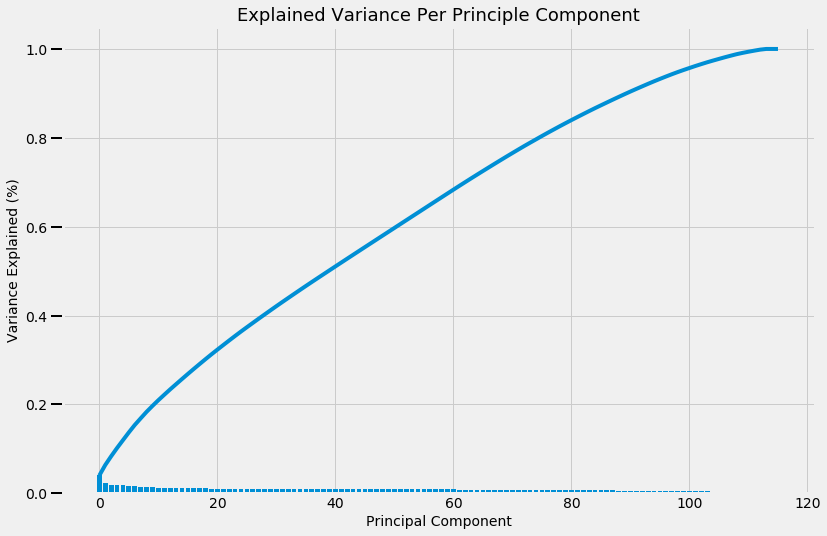

In [459]:
scree_plot(pca, figsize=(12, 8))

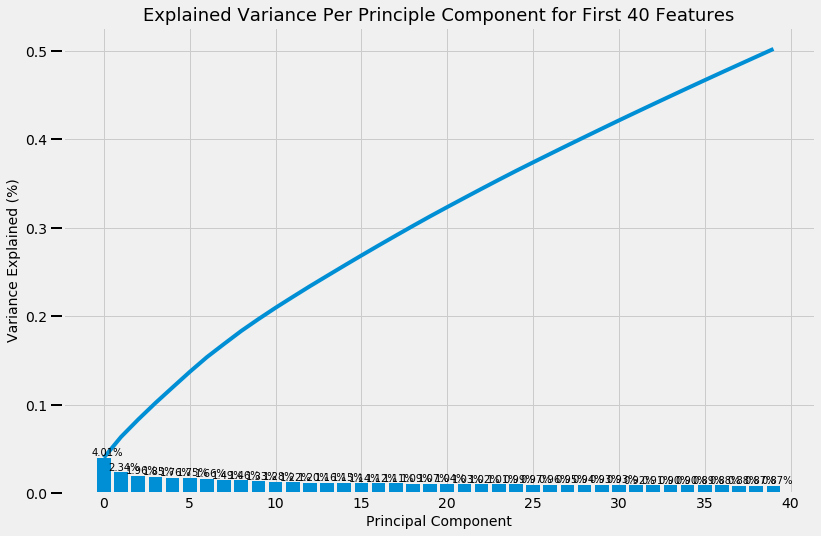

In [460]:
scree_plot(pca, limit=40, figsize=(12, 8))

In [461]:
for i in np.arange(5, 40, 5):
    print('For {} components, explained variance:'.format(i), 
          pca.explained_variance_ratio_[:i].sum())

For 5 components, explained variance: 0.119582080241
For 10 components, explained variance: 0.196699115572
For 15 components, explained variance: 0.257143357971
For 20 components, explained variance: 0.312793268517
For 25 components, explained variance: 0.364060177714
For 30 components, explained variance: 0.411805337287
For 35 components, explained variance: 0.457649772847


In [462]:
pca_35 = PCA(n_components=35)
X_pca_35 = pca_35.fit_transform(data_standard)


### Step 3.3: Interpret Principal Components


In [463]:
def pca_results(full_dataset, pca):
    """
Description: This function can be used to Create a DataFrame of the PCA results 
Includes dimension feature weights and explained variance. 

Arguments:
    full_dataset: the data. 
    pca: fit_transform for data_standard. 

Returns:
    the PCA results
"""
    # Create dimensions index
    dimensions = ['Dimension {}'.format(i) for i \
                  in range(1, len(pca.components_) + 1)]
    
    # Capture pca components
    pca_comp = pca.components_
    
    # Create components df
    components_df = pd.DataFrame(np.round(pca_comp, 4), 
                              columns= full_dataset.columns)
    components_df.index = dimensions
    
    # Create PCA variance explained df
    ratios = pca.explained_variance_ratio_.reshape(len(pca_comp), 1)
    ratios_df = pd.DataFrame(np.round(ratios, 4), 
                             columns=['Explained Variance'])
    ratios_df.index = dimensions
    
    # Return combined df
    return pd.merge(ratios_df, components_df, left_index=True, right_index=True)

In [464]:
results = pca_results(movies, pca_35)
results.head()

,Explained Variance,budget,popularity,revenue,runtime,vote_average,vote_count,profit,year,Action,...,Bosnia and Herzegovina,Argentina,Philippines,Italy,Algeria,Russia,China,Finland,Taiwan,South Korea
Dimension 1,0.0402,0.3716,0.3551,0.4243,0.1378,0.1173,0.3956,0.3968,0.0398,0.1609,...,-0.0010,-0.0196,0.0064,-0.0217,-0.0066,-0.0072,0.0186,-0.0098,0.0229,-0.0038
Dimension 2,0.0235,0.0043,0.0609,0.0102,0.3215,0.2340,0.0702,0.0110,-0.0408,0.0717,...,0.0011,0.1031,0.0209,0.1806,-0.0173,0.0322,0.0919,0.1357,0.0510,0.0422
Dimension 3,0.0197,0.0013,-0.0035,0.0581,0.0565,0.1600,-0.0028,0.0692,-0.0425,-0.2704,...,-0.0198,0.0792,-0.0191,0.0670,-0.0098,-0.0159,-0.0150,0.1138,-0.0041,-0.0105
Dimension 4,0.0186,0.0336,-0.0426,-0.0227,-0.2882,-0.2182,-0.0591,-0.0373,0.1841,0.0765,...,0.0012,0.1329,0.0032,0.0872,0.0103,0.0370,0.0088,0.2300,-0.0187,0.0158
Dimension 5,0.0176,-0.0365,-0.0303,-0.0168,-0.0304,-0.0264,-0.0418,-0.0091,-0.0214,-0.0095,...,-0.0028,0.0010,-0.0023,0.0016,0.0089,0.0016,-0.0213,-0.0098,-0.0151,-0.0110


In [465]:
def weighted_features(results, dimension_name):
    """
Description: This function can be used to show High Positive and 
High Negative features that weights >= 0.15 and  <= -0.15

Arguments:
    results: results that return from pca_results method. 
    dimension_name: name of dimension_name that we waint. 

Returns:
    None
"""
    print("High Positive\n", 
      results.loc[dimension_name][results.loc[dimension_name] >= 0.15].sort_values(ascending=False))
    print("\nHigh Negative\n", 
      results.loc[dimension_name][results.loc[dimension_name] <= -0.15].sort_values())

In [466]:
weighted_features(results, 'Dimension 1')

High Positive
 revenue       0.4243
profit        0.3968
vote_count    0.3956
budget        0.3716
popularity    0.3551
Adventure     0.2337
Action        0.1609
Name: Dimension 1, dtype: float64

High Negative
 Series([], Name: Dimension 1, dtype: float64)


In [467]:
weighted_features(results, 'Dimension 2')

High Positive
 runtime           0.3215
Drama             0.2576
History           0.2395
vote_average      0.2340
War               0.2124
France            0.2075
United Kingdom    0.2060
Italy             0.1806
Sweden            0.1794
Denmark           0.1686
Germany           0.1568
Name: Dimension 2, dtype: float64

High Negative
 Comedy                     -0.2751
United States of America   -0.2591
Family                     -0.2221
Animation                  -0.1758
Name: Dimension 2, dtype: float64


In [468]:
weighted_features(results, 'Dimension 3')

High Positive
 Family          0.2659
Comedy          0.2576
Romance         0.2480
Animation       0.2216
vote_average    0.1600
Name: Dimension 3, dtype: float64

High Negative
 Thriller          -0.4659
Horror            -0.2802
Action            -0.2704
Mystery           -0.2358
Crime             -0.2219
Science Fiction   -0.1732
Name: Dimension 3, dtype: float64


In [469]:
weighted_features(results, 'Dimension 4')

High Positive
 Denmark      0.2722
Sweden       0.2606
Finland      0.2300
Norway       0.2220
Animation    0.2070
Family       0.2029
year         0.1841
France       0.1795
Iceland      0.1786
Name: Dimension 4, dtype: float64

High Negative
 runtime                    -0.2882
Drama                      -0.2805
vote_average               -0.2182
United States of America   -0.1920
Romance                    -0.1832
History                    -0.1596
Name: Dimension 4, dtype: float64


In [470]:
weighted_features(results, 'Dimension 4')

High Positive
 Denmark      0.2722
Sweden       0.2606
Finland      0.2300
Norway       0.2220
Animation    0.2070
Family       0.2029
year         0.1841
France       0.1795
Iceland      0.1786
Name: Dimension 4, dtype: float64

High Negative
 runtime                    -0.2882
Drama                      -0.2805
vote_average               -0.2182
United States of America   -0.1920
Romance                    -0.1832
History                    -0.1596
Name: Dimension 4, dtype: float64


In [471]:
weighted_features(results, 'Dimension 6')

High Positive
 Cyprus    0.6171
Jordan    0.6171
Name: Dimension 6, dtype: float64

High Negative
 Series([], Name: Dimension 6, dtype: float64)


In [472]:
weighted_features(results, 'Dimension 7')

High Positive
 Cyprus                      0.3097
Jordan                      0.3097
United States of America    0.2682
Sweden                      0.2440
Denmark                     0.2242
Finland                     0.1979
Norway                      0.1851
Iceland                     0.1516
Name: Dimension 7, dtype: float64

High Negative
 Hong Kong   -0.2839
China       -0.2741
Adventure   -0.1586
Name: Dimension 7, dtype: float64


In [473]:
weighted_features(results, 'Dimension 8')

High Positive
 Colombia    0.4444
Ecuador     0.4297
Spain       0.2470
Name: Dimension 8, dtype: float64

High Negative
 Hong Kong   -0.3044
China       -0.2639
Taiwan      -0.1830
Action      -0.1790
Sweden      -0.1574
Name: Dimension 8, dtype: float64


In [474]:
weighted_features(results, 'Dimension 9')

High Positive
 Ecuador      0.5391
Colombia     0.5330
Hong Kong    0.3102
China        0.2688
Taiwan       0.1877
Name: Dimension 9, dtype: float64

High Negative
 Series([], Name: Dimension 9, dtype: float64)


In [475]:
weighted_features(results, 'Dimension 10')

High Positive
 Czech Republic    0.4227
Slovakia          0.2862
Hungary           0.2276
Slovenia          0.2156
Ukraine           0.2148
Poland            0.1873
War               0.1705
Russia            0.1553
Name: Dimension 10, dtype: float64

High Negative
 Spain     -0.1641
year      -0.1572
Foreign   -0.1516
Name: Dimension 10, dtype: float64


## Step 4: Clustering
### 4.1: Apply Clustering

A simple KMeans will now be applied to the PCA. Each cluster will be visualised with a different colour so hopefully we will be able to pick out clusters by eye.

In [480]:
from sklearn.cluster import KMeans

In [481]:
kmeans_10 = KMeans(n_clusters=10).fit(X_pca_35)

In [482]:
kmeans_10.score(X_pca_35)

-185548.31637171056

### 4.2:  Evaluation


In [483]:
k_means = range(1, 31)
scores = []

for k in k_means:
    print('Starting k = {} fitting'.format(k))
    model = KMeans(k).fit(X_pca_35)
    score = model.score(X_pca_35)
    scores.append(-score)

Starting k = 1 fitting
Starting k = 2 fitting
Starting k = 3 fitting
Starting k = 4 fitting
Starting k = 5 fitting
Starting k = 6 fitting
Starting k = 7 fitting
Starting k = 8 fitting
Starting k = 9 fitting
Starting k = 10 fitting
Starting k = 11 fitting
Starting k = 12 fitting
Starting k = 13 fitting
Starting k = 14 fitting
Starting k = 15 fitting
Starting k = 16 fitting
Starting k = 17 fitting
Starting k = 18 fitting
Starting k = 19 fitting
Starting k = 20 fitting
Starting k = 21 fitting
Starting k = 22 fitting
Starting k = 23 fitting
Starting k = 24 fitting
Starting k = 25 fitting
Starting k = 26 fitting
Starting k = 27 fitting
Starting k = 28 fitting
Starting k = 29 fitting
Starting k = 30 fitting


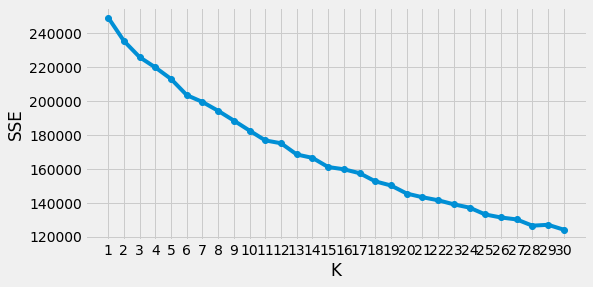

In [484]:
x = range(1, 31)
plt.figure(figsize=(8, 4))
plt.plot(x, scores, marker='o')
plt.xticks(x)
plt.xlabel('K')
plt.ylabel('SSE');

The curve for the clustering didn't have a sharp obvious change. I decided to use 10 clusters.

In [435]:
kmeans_10 = KMeans(n_clusters=10).fit(X_pca_35)

A simple KMeans will now be applied to the PCA projection data. Each cluster will be visualised with a different colour so hopefully we will be able to pick out clusters by eye.

In [373]:
# Initializing KMeans
kmeans = KMeans(n_clusters=10)
# Fitting with inputs
X_clustered = kmeans.fit_predict(X_pca_35)
# Predicting the clusters
#labels = kmeans.predict(X_pca_15)
# Getting the cluster centers
C = kmeans.cluster_centers_


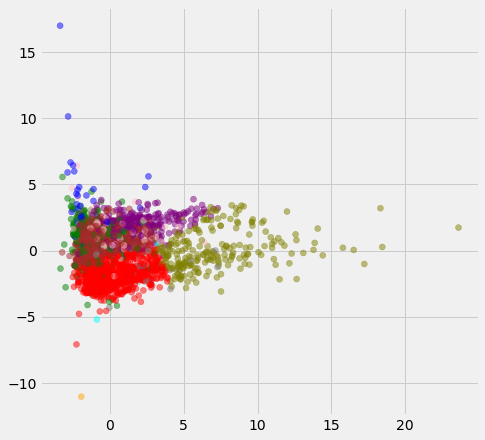

In [375]:
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b' , 3: 'gray', 4:'brown', 5:'orange', 6:'cyan', 7:'olive', 8:'purple', 9:'pink', 10:'grey'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X_pca_35[:,0],X_pca_35[:,2], c= label_color, alpha=0.5) 
plt.show()

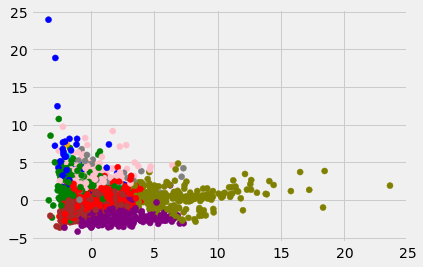

In [376]:
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b' , 3: 'gray',
                   4:'brown', 5:'orange', 6:'cyan', 7:'olive',
                   8:'purple', 9:'pink', 10:'grey'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.scatter( X_pca_35[:,0], X_pca_35[:,1], c=label_color)

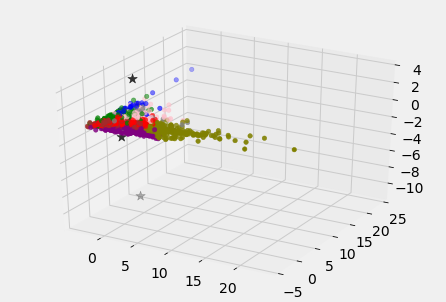

In [378]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b' , 3: 'gray',
                   4:'brown', 5:'orange', 6:'cyan', 7:'olive',
                   8:'purple', 9:'pink', 10:'grey'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
ax.scatter( X_pca_35[:,0], X_pca_35[:,1], c=label_color)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=100)

In [379]:
# Create a temp dataframe 
df = pd.DataFrame(X_pca)
df = df[[0,1,2]] # only want to visualise relationships between first 3 
df['X_cluster'] = X_clustered

/Users/reem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/reem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/reem/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/reem/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/reem/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


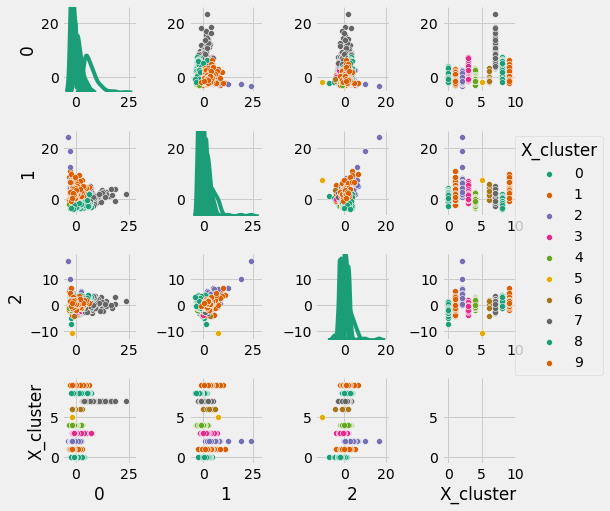

In [380]:
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)